## Data Understanding

### Data Loading

Import Library yang dibutuhkan dan load dataset yang akan digunakan.

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


Kemudian mengimport data ratings dengan pandas lalu menampilkan untuk melihat struktur data dari ratings.

In [41]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv')
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


Dari output code di atas didapatkan informasi sebagai berikut.
- Data ratings terdiri dari 100836 baris dan 4 kolom.
- Terdapat 3 kolom fitur yaitu `userId`, `movieId`, dan `timestamp`
- Terdapat 1 kolom target yaitu `rating`


Selanjutnya, mengimport data movies dengan pandas lalu menampilkan untuk melihat struktur data dari movies.

In [42]:
df_movies = pd.read_csv('ml-latest-small/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


Dari output code di atas didapatkan informasi sebagai berikut.
- Data movies terdiri dari 9742 baris dan 3 kolom.
- Terdapat 3 kolom fitur yaitu `movieId`,`title`, dan `genres`

Lalu, mengimport data tags dengan pandas lalu menampilkan untuk melihat struktur data dari tags.

In [43]:
df_tags = pd.read_csv('ml-latest-small/tags.csv')
df_tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


Dari output code di atas didapatkan informasi sebagai berikut.
- Data tags terdiri dari 3683 baris dan 4 kolom.
- Terdapat 4 kolom fitur yaitu `userId`, `movieId`, `tag`, dan `timestamp`

### Exploratory Data Analysis

#### Mengecek Tipe Data

Pada tahap ini, akan dilakukan pengecekan tipe data dari masing-masing kolom pada data ratings, movies, dan tags.

In [44]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


Dari output code di atas tipe data dari semua kolom pada data movies sudah sesuai.

In [45]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Dari output code di atas tipe data dari semua kolom pada data ratings sudah sesuai.

In [46]:
df_tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


Dari output code di atas tipe data dari semua kolom pada data tags sudah sesuai.

#### Mengecek Missing Value

Lalu akan dilakukan pengecekan missing value pada data ratings, movies, dan tags. Hal ini dilakukan agar dataset yang akan digunakan tidak mengandung missing value sehingga tidak menimbulkan error pada saat pemodelan.

In [47]:
df_movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

Dari output code di atas tidak terdapat missing value pada data movies.

In [48]:
df_ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Dari output code di atas tidak terdapat missing value pada data ratings.

In [49]:
df_tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Dari output code di atas tidak terdapat missing value pada data tags.

#### Mengecek Duplikasi Data

Lalu akan dilakukan pengecekan duplikasi data pada data ratings, movies, dan tags. Hal ini dilakukan agar dataset yang digunakan tidak mengandung duplikasi data yang dapat mempengaruhi hasil analisis.

In [50]:
df_movies.duplicated().sum()

0

Dari output code di atas tidak terdapat duplikasi data pada data movies.

In [51]:
df_ratings.duplicated().sum()

0

Dari output code di atas tidak terdapat duplikasi data pada data ratings.

In [52]:
df_tags.duplicated().sum()

0

Dari output code di atas tidak terdapat duplikasi data pada data ratings.

#### Mengecek Distribusi Data

Selanjutnya, akan dilakukan pengecekan distribusi data hanya pada data ratings karena hanya kolom ratings yang memiliki tipe data numerik dan yang akan digunakan.

In [53]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


Dari output code di atas didapatkan informasi sebagai berikut.
- Rata-rata dari kolom ratings adalah 3.50
- Standar deviasi dari kolom ratings adalah 1.04
- Nilai minimum dari kolom ratings adalah 0.50
- Nilai 25% dari kolom ratings adalah 3.00
- Nilai 50% dari kolom ratings adalah 3.50
- Nilai 75% dari kolom ratings adalah 4.00
- Nilai maksimum dari kolom ratings adalah 5.00

Sehingga dapat disimpulkan bahwa distribusi data dari kolom ratings cenderung menumpuk di nilai 3.00 - 4.00. Hal ini bukanlah menjadi masalah karena data rating merupakan data yang bersifat subjektif dan dapat bervariasi.

Untuk memastikan distribusi data dari kolom ratings, akan dilakukan visualisasi distribusi data dari kolom ratings.

<Axes: >

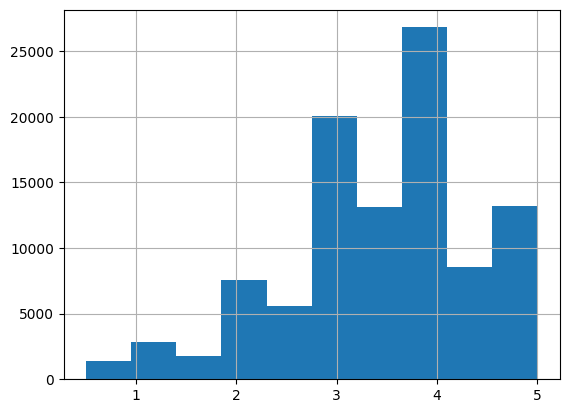

In [54]:
df_ratings['rating'].hist()

Dari histogram di atas, grafik terlihat left-skewed yang menunjukkan bahwa mayoritas film memiliki rating di antara 3.0 - 4.0.

## Data Preparation

### Merge Data

Langkah selanjutnya adalah menggabungkan dataset sesuai dengan kebutuhan. Data ratings akan digabungkan dengan data movies dan data movies juga akan digabungkan dengan data tags.

#### Data Movies dan Data Tags

Penggabungan data movies dengan data tags dilakukan untuk mengetahui kesamaan antar film berdasarkan tag dan genres yang diberikan oleh user. Hal ini akan berguna untuk memberikan rekomendasi film yang memiliki kesamaan berdasarkan genres dan tag yang diberikan oleh user.

Langkah pertama adalah menggabungkan setiap tag yang diberikan oleh user berdasarkan `movieId`.

In [55]:
df_tags = df_tags.groupby('movieId')['tag'].agg(lambda x: ' '.join(x)).reset_index()
df_tags.head()

,movieId,tag
0,1,pixar pixar fun
1,2,fantasy magic board game Robin Williams game
2,3,moldy old
3,5,pregnancy remake
4,7,remake


Dari output code di atas dapat dilihat kolom tags sudah digabungkan berdasarkan `movieId`.

Langkah selanjutnya yaitu mengganti pemisah pada kolom genre menjadi sebuah whitespace.

In [56]:
df_movies['genres'] = df_movies['genres'].apply(lambda x: x.replace("|"," "))


Lalu akan digabungakan data movies dengan data tags berdasarkan `movieId`.

In [57]:
df_movies_similarity = pd.merge(df_movies,df_tags,how='left',on='movieId')
df_movies_similarity.fillna(' ',inplace=True)
df_movies_similarity.head()

,movieId,title,genres,tag
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy,pixar pixar fun
1,2,Jumanji (1995),Adventure Children Fantasy,fantasy magic board game Robin Williams game
2,3,Grumpier Old Men (1995),Comedy Romance,moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance,
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake


Dari output code di atas dapat dilihat kolom tags sudah digabungkan berdasarkan `movieId` meskipun terdapat beberapa missing value pada kolom tags. Missing value pada kolom tags ini akan diisi dengan whitespace.

Langkah Selanjutnya menggabungakan kolom tag dengan kolom genres menjadi satu kolom baru. Hal ini dilakukan agar nantinya dapat digunakan untuk menghitung kesamaan antar film berdasarkan tag dan genres hanya dengan satu kolom saja.

In [58]:
df_movies_similarity['tags'] = df_movies_similarity['genres'] + " " + df_movies_similarity['tag']
df_movies_similarity.drop(columns=['genres','tag'],inplace=True)
df_movies_similarity.head()

,movieId,title,tags
0,1,Toy Story (1995),Adventure Animation Children Comedy Fantasy pi...
1,2,Jumanji (1995),Adventure Children Fantasy fantasy magic board...
2,3,Grumpier Old Men (1995),Comedy Romance moldy old
3,4,Waiting to Exhale (1995),Comedy Drama Romance
4,5,Father of the Bride Part II (1995),Comedy pregnancy remake


#### Data Movies dan Data Ratings

Pada tahap ini, akan dilakukan penggabungan data ratings dengan data movies. Hal ini dilakukan agar nantinya dapat digunakan untuk memberikan rekomendasi film berdasarkan rating yang diberikan oleh user pada movie dengan mempertimbangkan genres.

In [59]:
df_ratings_movie= pd.merge(df_ratings,df_movies,how='left',on='movieId')
df_ratings_movie.drop(columns=['timestamp'],axis=1,inplace=True)
df_ratings_movie['genres'] = df_ratings_movie['genres'].apply(lambda x: np.nan if x == '(no genres listed)' else x)
df_ratings_movie.dropna(inplace=True)
df_ratings_movie.reset_index()
df_ratings_movie.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure Animation Children Comedy Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy Romance
2,1,6,4.0,Heat (1995),Action Crime Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime Mystery Thriller


Pada output code di atas, data movies dan data ratings sudah digabungkan berdasarkan `movieId`.

Langkah selanjutnya yaitu melakukan encoding dengan menjabarkan kolom genres menjadi beberapa kolom berdasarkan nilai yang ada pada kolom genres yang berisi nilai 1 atau 0.
Hal ini dilakukan karena model machine learning hanya dapat memproses data yang berupa numerik.

In [60]:
df_ratings_movie['genres'] = df_ratings_movie['genres'].str.split(' ')
df_genres = df_ratings_movie['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0).astype(int)
df_ratings_encode= pd.concat([df_ratings_movie, df_genres], axis=1)
df_ratings_encode.drop(columns=['genres'],inplace=True)
df_ratings_encode.head()

,userId,movieId,rating,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,1,4.0,Toy Story (1995),1,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,6,4.0,Heat (1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,50,5.0,"Usual Suspects, The (1995)",0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Dari output code di atas dapat dilihat kolom genres sudah dijabarkan dengan masing-masing jenis genres diwakili oleh satu kolom.

### Data Transformation

Setelah melakukan penggabungan data, langkah selanjutnya adalah melakukan transformasi data. Pada tahap ini, data yang berisi rating dan movie akan ditransformasi menjadi data yang berisi user, movie, dan rating. Sehingga data user dan movie akan menjadi X dan data rating akan menjadi y.

#### Data User

Pada tahap ini, akan dilakukan pembuatan data preferensi user berdasarkan rating yang diberikan oleh user pada setiap film dengan mempertimbangkan genres. Sehingga kolom yang tidak diperlukan akan dihapus.

In [61]:
df_user = df_ratings_encode.copy()
df_user.drop(columns=['movieId','title'],inplace=True)
df_user

,userId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,...,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,4.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,4.0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,5.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,5.0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,4.0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
100832,610,5.0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
100833,610,5.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100834,610,5.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


Selanjutnya setiap value 1 pada fitur genres akan dikalikan dengan rating yang diberikan oleh user pada film tersebut.

In [62]:
for i in range(2, 21):
    genre_column = df_user.columns[i]
    df_user[genre_column] = df_user.apply(lambda row: row['rating'] if row[genre_column] == 1 else np.nan,axis=1)

df_user

,userId,rating,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,...,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,4.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100832,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100833,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100834,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


Lalu akan dilakukan grouping berdasarkan `userId` dan dengan menghitung rata-rata dari fitur genres, sedangkan kolom rating akan dihapus karena sudah tidak diperlukan.

In [63]:
genre_columns = df_user.columns[2:]
df_user_avg = df_user.groupby('userId')[genre_columns].mean().reset_index()
df_user_avg.fillna(0,inplace=True)
df_user_avg.head()

,userId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.0,0.000000,0.000000
1,2,4.166667,0.000000,0.000000,4.000000,0.000000,4.500000,3.954545,3.800000,3.700000,4.000000,3.000000,3.882353,4.500000,3.500000,3.875000,0.000000,0.0,3.750000,4.333333
2,3,2.727273,0.500000,0.500000,1.000000,3.375000,0.500000,3.571429,0.500000,4.142857,5.000000,4.687500,0.750000,0.500000,0.000000,4.200000,0.500000,0.0,0.000000,0.000000
3,4,3.655172,4.000000,3.800000,3.509615,3.684211,3.379310,3.320000,3.814815,3.552632,3.478261,4.250000,3.483333,3.571429,3.800000,2.833333,4.000000,4.0,3.000000,4.000000
4,5,3.250000,4.333333,4.111111,3.466667,4.142857,3.090909,3.111111,3.833333,3.555556,4.000000,3.000000,3.800000,3.333333,3.000000,2.500000,4.400000,0.0,3.666667,0.000000


Dari output code di atas menunjukan bahwa data preferensi user sudah berhasil dibuat.

Langkah selanjutnya adalah melakukan penggabungan data preferensi user dengan data ratings berdasarkan `userId`. Hal ini bertujuan untuk menggantikan data user dengan data preferensi user.

In [64]:
df_user = pd.merge(df_user,df_user_avg,how='left',on='userId')
df_user

,userId,rating,Adventure_x,Animation_x,Children_x,Comedy_x,Fantasy_x,Romance_x,Action_x,Crime_x,...,Mystery_y,Horror_y,Drama_y,War_y,Western_y,Sci-Fi_y,Musical_y,Film-Noir_y,IMAX_y,Documentary_y
0,1,4.0,4.0,4.0,4.0,4.0,4.0,NaN,NaN,NaN,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
1,1,4.0,NaN,NaN,NaN,4.0,NaN,4.0,NaN,NaN,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
2,1,4.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
3,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
4,1,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,...,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100784,610,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100785,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100786,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100787,610,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2


Langkah selanjutnya melakukan drop data user yang sudah tidak diperlukan.

In [65]:
df_user.drop(columns=df_user.columns[1:21],inplace=True)
df_user.head()

,userId,Adventure_y,Animation_y,Children_y,Comedy_y,Fantasy_y,Romance_y,Action_y,Crime_y,Thriller_y,Mystery_y,Horror_y,Drama_y,War_y,Western_y,Sci-Fi_y,Musical_y,Film-Noir_y,IMAX_y,Documentary_y
0,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.5,4.285714,4.225,4.681818,5.0,0.0,0.0
1,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.5,4.285714,4.225,4.681818,5.0,0.0,0.0
2,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.5,4.285714,4.225,4.681818,5.0,0.0,0.0
3,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.5,4.285714,4.225,4.681818,5.0,0.0,0.0
4,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.5,4.285714,4.225,4.681818,5.0,0.0,0.0


Lalu akan dilakukan rename fitur genres yang namanya berubah ketika melakukan penggabungan data.

In [66]:
df_user.columns = ['userId'] + genre_columns.tolist()
df_user

,userId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
1,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
2,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
3,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
4,1,4.388235,4.689655,4.547619,4.277108,4.297872,4.307692,4.322222,4.355556,4.145455,4.166667,3.470588,4.529412,4.500000,4.285714,4.225000,4.681818,5.00,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100784,610,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,3.573529,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100785,610,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,3.573529,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100786,610,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,3.573529,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2
100787,610,3.705993,3.901515,3.651786,3.731144,3.592715,3.731092,3.600580,3.800366,3.573529,3.766667,3.506601,3.874739,3.776596,3.742424,3.659363,3.928571,4.35,3.628049,4.2


#### Data Item

Selanjutnya, akan dilakukan pembuatan data movie dengan genres dengan menghapus kolom yang tidak berkaitan dengan movie.

In [67]:
df_item = df_ratings_encode.copy()
df_item.drop(columns=['userId','rating','title'],inplace=True)
df_item.head()

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,47,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
4,50,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0


Dari output code di atas, terlihat data movie (yang akan disebut item) yang akan disandingkan dengan data preferensi user (yang akan disebut user) hanya berisi fitur `movieId` dan fitur one hot encoding genres.

#### Data Rating

Selanjutnya, untuk data rating sebagai Y akan diambil kolom `rating` saja.

In [68]:
rating = df_ratings_encode['rating'].values

### Scalling Data

Lalu data user dan data item akan di scalling dengan menggunakan Standard Scaler. Alasan Standard Scaler digunakan yaitu karena akan dilakukan pembagian rentang rating, jika value genre bernilai positif menandakan user menyukai film tersebut, sedangkan jika value genre bernilai negatif menandakan user tidak menyukai film tersebut. Atau jika pada data item, value genre bernilai positif menandakan film tersebut memiliki genre tersebut, sedangkan jika value genre bernilai negatif menandakan film tersebut tidak memiliki genre tersebut.

In [69]:
scaler_user = StandardScaler()
scaler_item = StandardScaler()

scaler_user.fit(df_user[genre_columns])
scaler_item.fit(df_item[genre_columns])

df_user[genre_columns] = scaler_user.transform(df_user[genre_columns])
df_item[genre_columns] = scaler_item.transform(df_item[genre_columns])

In [70]:
df_user.head()

,userId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,1.854035,1.351371,1.524218,1.72754,1.425833,1.530181,1.802559,1.408636,1.321439,0.934757,0.331341,1.937017,1.082297,0.877787,1.542293,1.340258,1.221822,-2.452027,-1.422555
1,1,1.854035,1.351371,1.524218,1.72754,1.425833,1.530181,1.802559,1.408636,1.321439,0.934757,0.331341,1.937017,1.082297,0.877787,1.542293,1.340258,1.221822,-2.452027,-1.422555
2,1,1.854035,1.351371,1.524218,1.72754,1.425833,1.530181,1.802559,1.408636,1.321439,0.934757,0.331341,1.937017,1.082297,0.877787,1.542293,1.340258,1.221822,-2.452027,-1.422555
3,1,1.854035,1.351371,1.524218,1.72754,1.425833,1.530181,1.802559,1.408636,1.321439,0.934757,0.331341,1.937017,1.082297,0.877787,1.542293,1.340258,1.221822,-2.452027,-1.422555
4,1,1.854035,1.351371,1.524218,1.72754,1.425833,1.530181,1.802559,1.408636,1.321439,0.934757,0.331341,1.937017,1.082297,0.877787,1.542293,1.340258,1.221822,-2.452027,-1.422555


Dari output code di atas jika value genre bernilai positif menandakan user menyukai genre tersebut, sedangkan jika value genre negatif menandakan user tidak menyukai genre tersebut, atau jika value bernilai 0 menandakan user tidak memiliki preferensi terhadap genre tersebut atau user tidak pernah menonton film dengan genre tersebut

In [71]:
df_item.head()

,movieId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1,1.780887,3.663762,3.153698,1.257309,2.741697,-0.468237,-0.660819,-0.445341,-0.596522,-0.287079,-0.279249,-0.843992,-0.225059,-0.139724,-0.454301,-0.206915,-0.093312,-0.207097,-0.110646
1,3,-0.561518,-0.272943,-0.317088,1.257309,-0.364738,2.135668,-0.660819,-0.445341,-0.596522,-0.287079,-0.279249,-0.843992,-0.225059,-0.139724,-0.454301,-0.206915,-0.093312,-0.207097,-0.110646
2,6,-0.561518,-0.272943,-0.317088,-0.795349,-0.364738,-0.468237,1.513273,2.245472,1.676383,-0.287079,-0.279249,-0.843992,-0.225059,-0.139724,-0.454301,-0.206915,-0.093312,-0.207097,-0.110646
3,47,-0.561518,-0.272943,-0.317088,-0.795349,-0.364738,-0.468237,-0.660819,-0.445341,1.676383,3.483365,-0.279249,-0.843992,-0.225059,-0.139724,-0.454301,-0.206915,-0.093312,-0.207097,-0.110646
4,50,-0.561518,-0.272943,-0.317088,-0.795349,-0.364738,-0.468237,-0.660819,2.245472,1.676383,3.483365,-0.279249,-0.843992,-0.225059,-0.139724,-0.454301,-0.206915,-0.093312,-0.207097,-0.110646


Dari output code di atas jika value genre bernilai positif menandakan film tersebut memiliki genre tersebut, sedangkan jika value genre negatif menandakan film tersebut tidak memiliki genre tersebut, sedangkan tidak terdapat value 0 karena setiap film pasti memiliki genre.

Selanjutnya akan dilakukan scalling pada data rating dengan menggunakan MinMaxScaler. Hal ini bertujuan agar data rating memiliki rentang nilai antara 0 - 1.

In [125]:
scaler = MinMaxScaler((-1,1))
rating = scaler.fit_transform(rating.reshape(-1,1))
rating

array([[0.55555556],
       [0.55555556],
       [0.55555556],
       ...,
       [1.        ],
       [1.        ],
       [0.11111111]])

### Data Splitting

 Selanjutnya, data user, data item, dan data rating akan di split menjadi data train, data test, dan data validation. Hal ini bertujuan agar dapat dilakukan evaluasi model machine learning yang akan dibuat. Perbandingan data train, data test, dan data validation yang digunakan adalah 80% data train, 10% data test, dan 10% data validation. Hal ini dipertimbangkan berdasarkan jumlah data yang ada.

In [126]:
user_train, user_test, item_train, item_test, rating_train, rating_test = train_test_split(df_user[genre_columns], df_item[genre_columns], rating.flatten(), test_size=0.2, random_state=42)
user_test, user_val, item_test, item_val, rating_test, rating_val = train_test_split(user_test, item_test, rating_test, test_size=0.5, random_state=42)

user_train.shape, user_test.shape, user_val.shape, item_train.shape, item_test.shape, item_val.shape, rating_train.shape, rating_test.shape, rating_val.shape


((80631, 19),
 (10079, 19),
 (10079, 19),
 (80631, 19),
 (10079, 19),
 (10079, 19),
 (80631,),
 (10079,),
 (10079,))

## Content-Based Filtering

Tahap selanjutnya yaitu membuat sistem rekomendasi film berdasarkan konten. Pada tahap ini akan dilakukan pembuatan model neural network dengan menggunakan data preferensi user dan data movie. Selain itu juga akan dibuat akan dihitung similarity antar film berdasarkan genres dan tag.

### Memory-Based Item Based

Pada perhitungan similarity antar film berdasarkan genres dan tag, akan digunakan cosine similarity. Hal ini dilakukan karena cosine similarity dapat mengukur kesamaan antar film berdasarkan genres dan tag. Tetapi sebelum itu, akan dilakukan ekstraksi data tags dengan menggunakan CountVectorizer. Dengan menggunakan CountVectorizer, akan dihitung frekuensi kemunculan setiap kata pada kolom tags.

In [127]:
cv = CountVectorizer(max_features = 5000, lowercase=True)
vectors = cv.fit_transform(df_movies_similarity['tags']).toarray()

Selanjutnya akan dilakukan perhitungan similarity antar vector features tags dengan menggunakan cosine similarity.

In [128]:
cosine_sim = cosine_similarity(vectors)

Setelah itu akan dilakukan visualisasi similarity antar film berdasarkan tags.

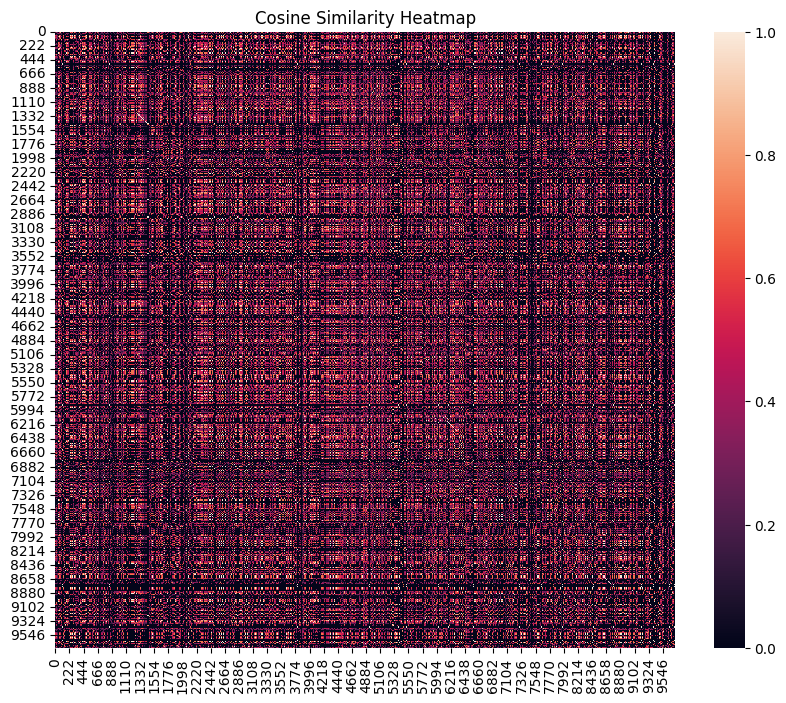

In [129]:
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim)
plt.title('Cosine Similarity Heatmap')
plt.show()

Dari diagram heatmap di atas, terlihat bahwa banyak daerah yang memiliki warna yang cendrung terang yang menunjukkan bahwa terdapat banyak kesamaan antar film berdasarkan tags.

Selanjutnya akan dibentuk suatu function yang berfungsi mengambil 10 movie yang memiliki similarity tertinggi berdasarkan tags.

In [130]:
def get_recommendation_movie(title):
    index = df_movies_similarity[df_movies_similarity['title'] == title].index[0]
    similarity_score = cosine_sim[index] 
    similarity_place = sorted(enumerate(similarity_score),key=lambda x: x[1],reverse=True)[1:11]
    similarity_list = []    
    for i in similarity_place:
        similarity_list.append([df_movies_similarity.iloc[i[0], 1]] + [i[1]])
    return similarity_list

Dari function di atas, inputan dari function tersebut yaitu judul dari film yang ingin dicari movie yang memiliki similarity tertinggi berdasarkan tags. Nantinya function tersebut akan mengambil similarity movie tersebut dengan movie lainnya berdasarkan indeks. Selanjutnya akan dilakukan sorting, lalu mengambil top 10 movie yang memiliki similarity tertinggi.

In [131]:
top_10_recommendation = get_recommendation_movie('Toy Story (1995)')
top_10_recommendation

[["Bug's Life, A (1998)", 0.848528137423857],
 ['Toy Story 2 (1999)', 0.74535599249993],
 ['Antz (1998)', 0.7071067811865475],
 ['Adventures of Rocky and Bullwinkle, The (2000)', 0.7071067811865475],
 ["Emperor's New Groove, The (2000)", 0.7071067811865475],
 ['Monsters, Inc. (2001)', 0.7071067811865475],
 ['Wild, The (2006)', 0.7071067811865475],
 ['Shrek the Third (2007)', 0.7071067811865475],
 ['Tale of Despereaux, The (2008)', 0.7071067811865475],
 ['Asterix and the Vikings (Astérix et les Vikings) (2006)',
  0.7071067811865475]]

Dari output code di atas, terlihat top 10 movie yang memiliki similarity tertinggi dengan movie Toy Story (1995).

### Model-Based Deep Learning

Tahap selanjutnya yaitu membuat model neural network dengan menggunakan data preferensi user dan data movie. Model neural network yang akan dibuat akan menggunakan data preferensi user dan data movie sebagai X dan data rating sebagai y.

In [132]:
features = 19

user_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='linear')
])

item_model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='linear')
])

input_user = tf.keras.Input(shape=(features,))
vector_user = user_model(input_user)
vector_user = tf.linalg.l2_normalize(vector_user, axis=1)

input_item = tf.keras.Input(shape=(features,))
vector_item = item_model(input_item)
vector_item = tf.linalg.l2_normalize(vector_item, axis=1)

output = tf.keras.layers.Dot(axes=1)([vector_user, vector_item])

model = tf.keras.Model(inputs=[input_user, input_item], outputs=output)


Pada code di atas, secara garis besar terdapat dua model sequential yang akan digunakan. Model sequential pertama yaitu model untuk data user dan model sequential kedua yaitu model untuk data item. Nantinya output dari kedua model tersebut akan digabungkan dengan menggunakan dot product.

Selanjutnya akan dilakukan compile model dengan menggunakan optimizer Adagrad, loss function mean squared error, dan metrics mean squared error.

In [133]:
model.compile(optimizer=tf.keras.optimizers.Adagrad(0.01), loss='mean_squared_error', metrics=['mse'])

Model akan difit dengan menggunakan 100 epochs dan batch size 256. Ini berarti model akan melakukan iterasi sebanyak 100 kali dengan menggunakan 256 data pada setiap iterasinya.

In [134]:
history = model.fit([user_train, item_train], rating_train, epochs=100, batch_size=256, validation_data=([user_val, item_val], rating_val))

Epoch 1/100


315/315 [==============================] - 6s 10ms/step - loss: 0.1848 - mse: 0.1848 - val_loss: 0.1754 - val_mse: 0.1754
Epoch 2/100
315/315 [==============================] - 2s 7ms/step - loss: 0.1747 - mse: 0.1747 - val_loss: 0.1716 - val_mse: 0.1716
Epoch 3/100
315/315 [==============================] - 3s 8ms/step - loss: 0.1721 - mse: 0.1721 - val_loss: 0.1697 - val_mse: 0.1697
Epoch 4/100
315/315 [==============================] - 2s 7ms/step - loss: 0.1701 - mse: 0.1701 - val_loss: 0.1665 - val_mse: 0.1665
Epoch 5/100
315/315 [==============================] - 2s 7ms/step - loss: 0.1685 - mse: 0.1685 - val_loss: 0.1652 - val_mse: 0.1652
Epoch 6/100
315/315 [==============================] - 2s 6ms/step - loss: 0.1678 - mse: 0.1678 - val_loss: 0.1649 - val_mse: 0.1649
Epoch 7/100
315/315 [==============================] - 2s 6ms/step - loss: 0.1666 - mse: 0.1666 - val_loss: 0.1634 - val_mse: 0.1634
Epoch 8/100
315/315 [==============================] - 2s 6ms/step - loss: 0.165

## Evaluation

Langkah terakhir yaitu melakukan evaluasi model yang telah dibuat.

### Validation

Evaluation pertama yaitu melakukan evaluasi model dengan menggunakan data validation. Hal ini bertujuan untuk mengetahui seberapa baik model yang telah dibuat dengan menggunakan data yang belum pernah dilihat sebelumnya.

In [135]:
val_mse, val_loss = model.evaluate([user_val, item_val], rating_val, verbose=2)

315/315 - 2s - loss: 0.1522 - mse: 0.1522 - 2s/epoch - 8ms/step


Selanjutnya MSE dari train, test, dan validation akan divisualisasikan agar dapat dilihat perbandingannya.

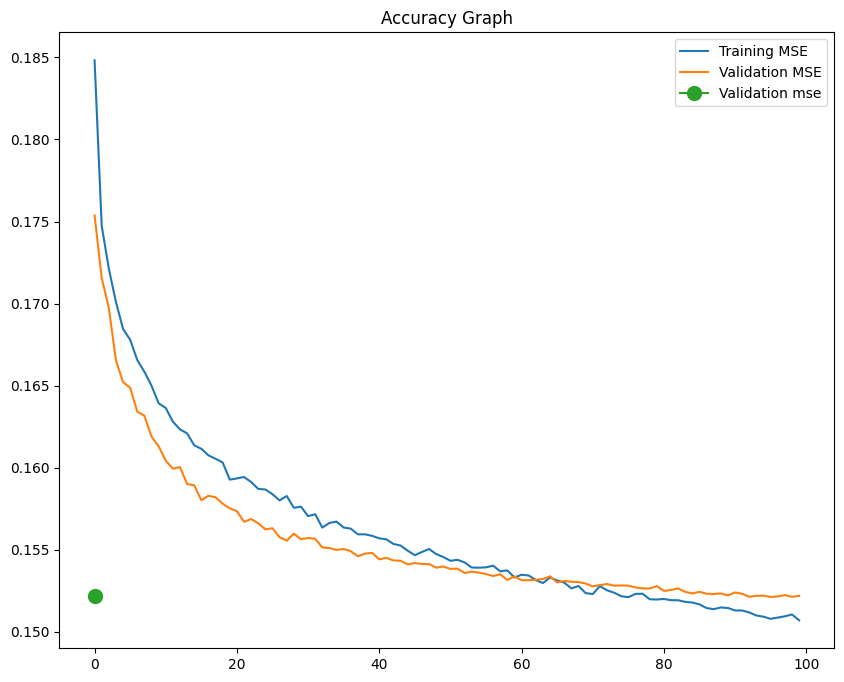

In [136]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.plot(val_mse, label='Validation mse', marker='o', markersize=10)
plt.legend()
plt.title('Accuracy Graph')
plt.show()

Berdasarkan grafik di atas, terlihat bahwa MSE dari data train, data test, dan data validation cenderung stabil dan tidak terlalu berbeda. Hal ini menunjukkan bahwa model yang telah dibuat tidak overfitting dan tidak underfitting.

### Prediction

Selanjutnya akan dilakukan prediksi top 10 movie berdasarkan suatu preferensi user. Berikut merupakan contoh preferensi user yang akan digunakan.

In [164]:
new_user_id = 1000
new_adventure = 4
new_animation = 5
new_children = 4
new_comedy = 3
new_fantasy = 4
new_romance = 1
new_action = 3
new_crime = 1
new_thriller = 1
new_mystery = 1
new_horror = 1
new_drama = 1
new_war = 1
new_western = 1
new_scifi = 1
new_musical = 1
new_filmnoir = 1
new_imax = 1
new_documentary = 1

new_user = pd.DataFrame([[new_user_id, new_adventure, new_animation, new_children, new_comedy, new_fantasy, new_romance, new_action, new_crime, new_thriller, new_mystery, new_horror, new_drama, new_war, new_western, new_scifi, new_musical, new_filmnoir, new_imax, new_documentary]], columns=['userId', 'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Action', 'Crime', 'Thriller', 'Mystery', 'Horror', 'Drama', 'War', 'Western', 'Sci-Fi', 'Musical', 'Film-Noir', 'IMAX', 'Documentary'])
new_user

,userId,Adventure,Animation,Children,Comedy,Fantasy,Romance,Action,Crime,Thriller,Mystery,Horror,Drama,War,Western,Sci-Fi,Musical,Film-Noir,IMAX,Documentary
0,1000,4,5,4,3,4,1,3,1,1,1,1,1,1,1,1,1,1,1,1


Dari output code tersebut terlihat user 1000 memiliki preferensi terhadap film dengan genres Adventure, Animation, Childern, Fantasy, dan Action.

Tetapi sebelum itu akan dilakukan scaling pada data preferensi user 1000 dan juga akan dilakukan penyesuaian dimensi agar dapat digunakan pada model yang telah dibuat.

In [165]:
new_user[genre_columns] = scaler_user.transform(new_user[genre_columns])

new_user = np.tile(new_user[genre_columns], (df_item.shape[0], 1))
new_user.shape

(100789, 19)

Setelah melakukan penyesuaian dimensi maka dimensi dari data user 1000 sama dengan dimensi dari data item yaitu (100789, 19).

Selanjutnya akan dilakukan prediction dengan data user 1000.

In [166]:
predictions = model.predict([new_user, df_item[genre_columns]])


  50/3150 [..............................] - ETA: 43s

3150/3150 [==============================] - 26s 8ms/step


In [167]:
predictions = scaler.inverse_transform(predictions)
sorted_predictions = np.argsort(predictions, axis=0)[::-1].flatten()
sorted_item = df_ratings.index.to_numpy()[sorted_predictions].flatten()
sorted_item

array([16528, 27156,  4871, ..., 47507, 40208, 95763], dtype=int64)

Setelah dilakukan prediksi, output dari prediksi tersebut akan dilakukan inverse transform dan melakukan sorting untuk mendapatkan top 10 movie yang direkomendasikan.

In [168]:
dic_predictions = {
    'userId': np.full((df_item.shape[0],), new_user_id),
    'index': df_ratings_movie.iloc[sorted_item].index,
    'predictions': predictions[sorted_predictions].flatten()
} 
df_predictions = pd.DataFrame(dic_predictions)
df_predictions.set_index('index', inplace=True)
df_predictions = pd.merge(df_predictions, df_ratings_movie, how='left', left_index=True, right_index=True).reset_index(drop=True)
df_predictions.drop_duplicates(subset=['movieId'], inplace=True)
df_predictions.drop(columns=['userId_y', 'rating'], inplace=True)
df_predictions.rename(columns={'userId_x': 'userId'}, inplace=True)
df_predictions.reset_index(drop=True,inplace=True)
df_predictions.head(10)

,userId,predictions,movieId,title,genres
0,1000,3.948474,26340,"Twelve Tasks of Asterix, The (Les douze travau...","[Action, Adventure, Animation, Children, Comed..."
1,1000,3.948474,108932,The Lego Movie (2014),"[Action, Adventure, Animation, Children, Comed..."
2,1000,3.948474,51939,TMNT (Teenage Mutant Ninja Turtles) (2007),"[Action, Adventure, Animation, Children, Comed..."
3,1000,3.915437,62956,Futurama: Bender's Game (2008),"[Action, Adventure, Animation, Comedy, Fantasy..."
4,1000,3.870868,2294,Antz (1998),"[Adventure, Animation, Children, Comedy, Fantasy]"
5,1000,3.870868,4016,"Emperor's New Groove, The (2000)","[Adventure, Animation, Children, Comedy, Fantasy]"
6,1000,3.870868,4886,"Monsters, Inc. (2001)","[Adventure, Animation, Children, Comedy, Fantasy]"
7,1000,3.870868,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
8,1000,3.870868,3114,Toy Story 2 (1999),"[Adventure, Animation, Children, Comedy, Fantasy]"
9,1000,3.870868,53121,Shrek the Third (2007),"[Adventure, Animation, Children, Comedy, Fantasy]"


Dari ouput code di atas, terlihat top 10 movie yang direkomendasikan untuk user 1000 berdasarkan preferensi user tersebut.